# Retraining a pretrained network

Here we'll take an in-depth look at how we can use dtoolAI to help with retraining a pre-trained image recognition network on new types of image. Using a pre-trained network makes training much faster.

We're going to load a network trained on the ImageNet <http://www.image-net.org/> dataset, a large collection of images with 1000 different labels. We'll then retrain our network on new data.

## Loading and examining data

We've already???

In [5]:
from dtoolai.data import ImageDataSet, scaled_float_array_to_pil_image

In [31]:
train_ds = ImageDataSet("http://bit.ly/3aRvimq")

In [33]:
imarray, label = train_ds[0]

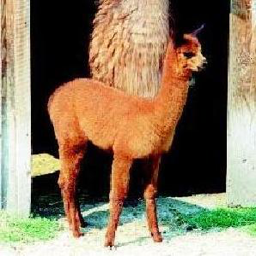

In [34]:
scaled_float_array_to_pil_image(imarray)

In [10]:
label

1

In [11]:
input_ds_train.cat_encoding

{'hedgehog': 0, 'llama': 1}

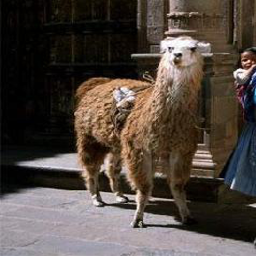

In [14]:
scaled_float_array_to_pil_image(ids[13][0])

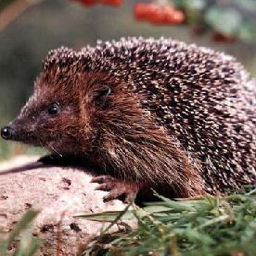

In [15]:
scaled_float_array_to_pil_image(ids[3][0])

## Setting parameters

In [ ]:
from dtoolai.parameters import Parameters

We need to make sure that we tell the model we'll create how many categories
it will need to classify. This corresponds to the size of the category encoding
in our input dataset.

In [41]:
init_params = {
    'n_outputs': len(input_ds_train.cat_encoding)
}

params = Parameters(
    batch_size=4,
    learning_rate=0.001,
    n_epochs=1,
    init_params=init_params
)

Then we load our pretrained model. We're using ResNet <https://arxiv.org/abs/1512.03385>, with a new classifier added at the end.

In [22]:
from dtoolai.models import ResNet18Pretrained

In [25]:
model = ResNet18Pretrained(**init_params)

Now we need to set a loss function and an optimiser:

In [42]:
import torch
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=params.learning_rate)

In [43]:
from dtoolai.training import train_model_with_metadata_capture
from dtoolcore import DerivedDataSetCreator

In [45]:
with DerivedDataSetCreator('twocat.image.model', '../scratch', train_ds) as output_ds:
    train_model_with_metadata_capture(model, train_ds, optim, loss_fn, params, output_ds)

Using device cpu
  Epoch 0, batch 0/27, running loss 0.641
  Epoch 0, batch 10/27, running loss 7.716
  Epoch 0, batch 20/27, running loss 13.031
Epoch 0, training loss 16.351, time 54.82s
